In [1]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 
import import_ipynb
import histplot

importing Jupyter notebook from histplot.ipynb


In [2]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

In [4]:
Winter18_1 = histplot.getData(17,direct, ASC, 335, 31, 6, float)
Winter18_2 = histplot.getData(18, direct, ASC, 1, 59, 6, float)
Spring18 = histplot.getData(18,direct, ASC, 60, 92,6, float)
Summer18 = histplot.getData(18, direct, ASC, 152, 92, 6 , float)
Fall18 = histplot.getData(18, direct, ASC, 244, 91, 6, float)

In [5]:
Winter18 = np.concatenate([Winter18_1, Winter18_2])
Season18 = np.concatenate([Winter18, Spring18, Summer18, Fall18])

In [6]:
Wprecip18, Wnonprecip18, Wpreciptotal18, Wtotalprep18 = histplot.preciphist(Winter18, len(Winter18), 5000, 1, 1)
Sp_precip18, Sp_nonprecip18, Sp_preciptotal18, Sp_totalprep18 = histplot.preciphist(Spring18, len(Spring18), 5000, 1, 1)
Su_precip18, Su_nonprecip18, Su_preciptotal18, Su_totalprep18 = histplot.preciphist(Summer18, len(Summer18), 5000, 1, 1)
Fprecip18, Fnonprecip18, Fpreciptotal18, Ftotalprep18 = histplot.preciphist(Fall18, len(Fall18), 5000, 1, 1)

In [7]:
precip18, nonprecip18, preciptotal18, totalprep18 = histplot.preciphist(Season18, len(Season18), 20000, 1, 1)
precip18 = precip18[precip18> 0]
nonprecip18 = nonprecip18[nonprecip18 > 0]
preciptotal18 = preciptotal18[preciptotal18 > 0]
perc18_100 = np.zeros(51)
for i in range(0, 51):
    perc18_100[i] =np.percentile(precip18, i*2)
print(perc18_100)
perc18_98 = perc18_100[:50]
print(perc18_98)

[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   2.   2.   2.   2.   2.   2.   3.   3.   3.   4.   5.
   5.   6.   7.   9.  11.  16.  22.  38. 433.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.
  2.  3.  3.  3.  4.  5.  5.  6.  7.  9. 11. 16. 22. 38.]


In [8]:
Wprecip18 = Wprecip18[Wprecip18 > 0]
Sp_precip18 = Sp_precip18[Sp_precip18 > 0]
Su_precip18 = Su_precip18[Su_precip18 > 0]
Fprecip18 = Fprecip18[Fprecip18 > 0]

print(len(Wprecip18))
print(len(Sp_precip18))
print(len(Su_precip18))
print(len(Fprecip18))

1028
943
684
1046


In [9]:
one_bin18_100 = np.unique(perc18_100)
one_bin18_98 = np.unique(perc18_98)
stop1 = np.array([1])
one_bin18_100 = np.setdiff1d(one_bin18_100, stop1)
one_bin18_98 = np.setdiff1d(one_bin18_98, stop1)
print(one_bin18_100)
print(one_bin18_98)
hist18_100, bin18_edge100 = np.histogram(precip18, bins = one_bin18_100)
hist18_98, bin18_edge98 = np.histogram(precip18, bins = one_bin18_98)
print(hist18_100)
print(hist18_98)

[  2.   3.   4.   5.   6.   7.   9.  11.  16.  22.  38. 433.]
[ 2.  3.  4.  5.  6.  7.  9. 11. 16. 22. 38.]
[431 227 135 115  70 101  71  89  75  74  78]
[431 227 135 115  70 101  71  89  75  79]


In [11]:
curve18_100, bin18_val_100 = histplot.calc(precip18, one_bin18_100)
print(curve18_100)
print(bin18_val_100)

[ -0.28073561 214.38102646]
[  2.5   3.5   4.5   5.5   6.5   8.   10.   13.5  19.   30.  235.5]


In [12]:
curve18_98, bin18_val_98 = histplot.calc(precip18, one_bin18_98)
print(curve18_98)
print(bin18_val_98)

[ -0.59569002 391.60175432]
[ 2.5  3.5  4.5  5.5  6.5  8.  10.  13.5 19.  30. ]


In [17]:
#Here is where start calculating standard error. 
def r2_calc(y, y_predicted):
    ymean = np.mean(y)
    y_resid = (y - y_predicted)
    y_diff = y - ymean
    print(np.sum(y_resid**2))
    print(np.sum(y_diff**2))
    R2 = 1 - (np.sum(y_resid**2))/(np.sum(y_diff**2))
    return R2

In [13]:
print(np.diff(bin18_edge100))

[  1.   1.   1.   1.   1.   2.   2.   5.   6.  16. 395.]


In [14]:
hist18_100_predict =curve18_100[1]*np.exp(curve18_100[0]*np.log(bin18_val_100))
print(hist18_100_predict)

[165.75644155 150.81587962 140.54206558 132.84345873 126.75719454
 119.57952589 112.31835535 103.24318777  93.79823649  82.50985214
  46.26835184]


In [15]:
hist18_98_predict =curve18_98[1]*np.exp(curve18_98[0]*np.log(bin18_val_98))
print(hist18_98_predict)

[226.8797508  185.67298685 159.85729229 141.84628386 128.41041632
 113.47049127  99.34696575  83.08374844  67.78035966  51.63429327]


In [18]:
R2_18_100_reg = r2_calc(hist18_100, hist18_100_predict)
print(R2_18_100_reg)

83416.61058338685
118610.18181818184
0.2967162742296727


In [19]:
R2_18_98_reg = r2_calc(hist18_98, hist18_98_predict)
print(R2_18_98_reg)

49918.45358449673
114624.09999999999
0.5645029833647834


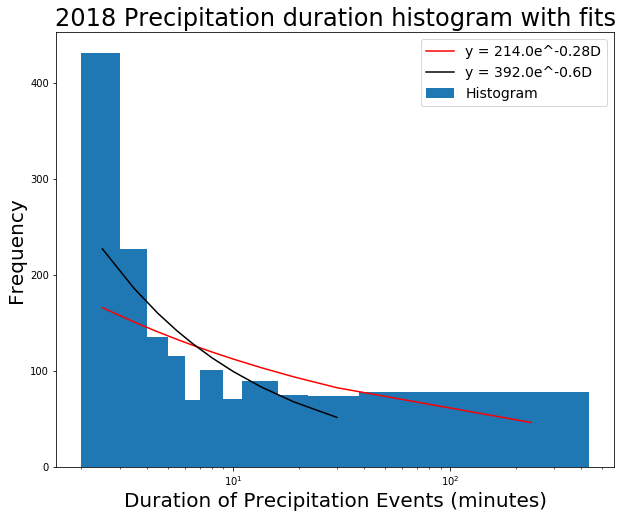

In [76]:
plt.figure(figsize = (10,8))
plt.bar(bin18_val_100, hist18_100, np.diff(bin18_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 Precipitation duration histogram with fits', fontsize = 24)
#plt.figtext(0.9, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep18)) + ' mm', fontsize = 14, ha='right')
#plt.figtext(0.9, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep18)) + ' mm', fontsize = 14, ha='right')
#plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep18)) + ' mm', fontsize = 14, ha='right')
#plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep18)) + ' mm', fontsize = 14, ha='right')
#plt.figtext(0.9, 0.4, 'Total 2018 Precipitation: ' + str(round(totalprep18)) + ' mm', fontsize = 14,ha='right')
plt.plot(bin18_val_100, hist18_100_predict, color = 'r')
plt.plot(bin18_val_98, hist18_98_predict, color = 'k')
label_18_100 = 'y = ' + str(round(curve18_100[1])) + 'e^' + str(round(curve18_100[0],2)) + 'D'
label_18_98 = 'y = ' + str(round(curve18_98[1])) + 'e^' + str(round(curve18_98[0],2)) + 'D'
plt.legend(labels = [label_18_100, label_18_98, 'Histogram'], fontsize = 14)
#plt.plot(bin18_val_98, )
#plt.plot(bin_val, test*y, color = 'k' )
#plt.legend(labels = ['$y = 214 e^{-0.28x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

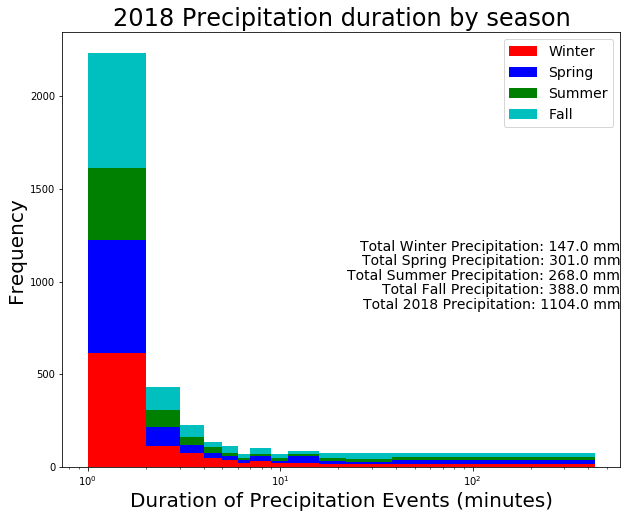

In [30]:
plt.figure(figsize = (10,8))
plt.hist([Wprecip18, Sp_precip18, Su_precip18,Fprecip18], bins = perc18_100, range= (precip18.min,precip18.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2018 Precipitation duration by season', fontsize = 24)
plt.figtext(0.9, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep18)) + ' mm', fontsize = 14,ha = 'right')
plt.figtext(0.9, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep18)) + ' mm', fontsize = 14,ha = 'right')
plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep18)) + ' mm', fontsize = 14, ha = 'right')
plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep18)) + ' mm', fontsize = 14, ha = 'right')
plt.figtext(0.9, 0.4, 'Total 2018 Precipitation: ' + str(round(totalprep18)) + ' mm', fontsize = 14,ha='right')
plt.legend(labels = ['Winter','Spring','Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [32]:
Summer17 = histplot.getData(18, direct, ASC, 197, 47, 6 , float)
Fall17 = histplot.getData(18, direct, ASC, 244, 91, 6, float)

In [33]:
Season17 = np.concatenate([Summer17, Fall17])

In [34]:
Su_precip17, Su_nonprecip17, Su_preciptotal17, Su_totalprep17 = histplot.preciphist(Summer17, len(Summer17), 5000, 1, 1)
Fprecip17, Fnonprecip17, Fpreciptotal17, Ftotalprep17 = histplot.preciphist(Fall17, len(Fall17), 5000, 1, 1)

In [35]:
precip17, nonprecip17, preciptotal17, totalprep17 = histplot.preciphist(Season17, len(Season17), 20000, 1, 1)
precip17 = precip17[precip17> 0]
nonprecip17 = nonprecip17[nonprecip17 > 0]
preciptotal17 = preciptotal17[preciptotal17 > 0]
perc17_100 = np.zeros(51)
for i in range(0, 51):
    perc17_100[i] =np.percentile(precip17, i*2)
print(perc17_100)
perc17_98 = perc17_100[:50]
print(perc17_98)

[  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   2.     2.     2.     2.     2.     2.     3.     3.     3.     4.
   4.     5.     5.     7.     8.    10.    14.    19.    27.    39.36
 433.  ]
[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    2.    2.    2.    2.    2.    2.
  3.    3.    3.    4.    4.    5.    5.    7.    8.   10.   14.   19.
 27.   39.36]


In [36]:
Su_precip17 = Su_precip17[Su_precip17 > 0]
Fprecip17 = Fprecip17[Fprecip17 > 0]


In [37]:
one_bin17_100 = np.unique(perc17_100)
one_bin17_98 = np.unique(perc17_98)
stop1 = np.array([1])
one_bin17_100 = np.setdiff1d(one_bin17_100, stop1)
one_bin17_98 = np.setdiff1d(one_bin17_98, stop1)
print(one_bin17_100)
print(one_bin17_98)
hist17_100, bin17_edge100 = np.histogram(precip17, bins = one_bin17_100)
hist17_98, bin17_edge98 = np.histogram(precip17, bins = one_bin17_98)
print(hist17_100)
print(hist17_98)

[  2.     3.     4.     5.     7.     8.    10.    14.    19.    27.
  39.36 433.  ]
[ 2.    3.    4.    5.    7.    8.   10.   14.   19.   27.   39.36]
[182  91  49  78  20  32  31  31  27  33  29]
[182  91  49  78  20  32  31  31  27  33]


In [38]:
curve17_100, bin17_val_100 = histplot.calc(precip17, one_bin17_100)
print(curve17_100)
print(bin17_val_100)

[-0.31758919 94.62179963]
[  2.5    3.5    4.5    6.     7.5    9.    12.    16.5   23.    33.18
 236.18]


In [39]:
curve17_98, bin17_val_98 = histplot.calc(precip17, one_bin17_98)
print(curve17_98)
print(bin17_val_98)

[ -0.6108407  168.69640883]
[ 2.5   3.5   4.5   6.    7.5   9.   12.   16.5  23.   33.18]


In [40]:
hist17_100_predict =curve17_100[1]*np.exp(curve17_100[0]*np.log(bin17_val_100))
print(hist17_100_predict)
hist17_98_predict =curve17_98[1]*np.exp(curve17_98[0]*np.log(bin17_val_98))
print(hist17_98_predict)

[70.73099333 63.56251493 58.68646741 53.56224549 49.89777757 47.09058598
 42.97886102 38.84467209 34.95595394 31.11553697 16.68302634]


In [41]:
hist17_98_predict =curve17_98[1]*np.exp(curve17_98[0]*np.log(bin17_val_98))
print(hist17_98_predict)

[96.3890909  78.48143452 67.31270582 56.46500661 49.27002733 44.07737023
 36.97413394 30.43806872 24.84889343 19.8651864 ]


In [42]:
R2_17_100_reg = r2_calc(hist17_100, hist17_100_predict)
print(R2_17_100_reg)
R2_17_98_reg = r2_calc(hist17_98, hist17_98_predict)
print(R2_17_98_reg)

15369.830052531697
22839.636363636368
0.3270545201410282


In [44]:
R2_17_98_reg = r2_calc(hist17_98, hist17_98_predict)
print(R2_17_98_reg)

9500.807376142438
22106.4
0.5702236738617578


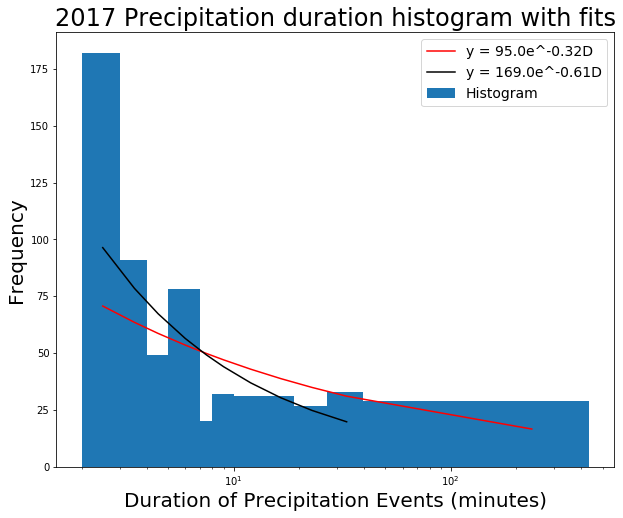

In [77]:
plt.figure(figsize = (10,8))
plt.bar(bin17_val_100, hist17_100, np.diff(bin17_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 Precipitation duration histogram with fits', fontsize = 24)
plt.plot(bin17_val_100, hist17_100_predict, color = 'r')
plt.plot(bin17_val_98, hist17_98_predict, color = 'k')
label_17_100 = 'y = ' + str(round(curve17_100[1])) + 'e^' + str(round(curve17_100[0],2)) + 'D'
label_17_98 = 'y = ' + str(round(curve17_98[1])) + 'e^' + str(round(curve17_98[0],2)) + 'D'
plt.legend(labels = [label_17_100, label_17_98, 'Histogram'], fontsize = 14)
#plt.plot(bin18_val_98, )
#plt.plot(bin_val, test*y, color = 'k' )
#plt.legend(labels = ['$y = 214 e^{-0.28x}$', 'Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

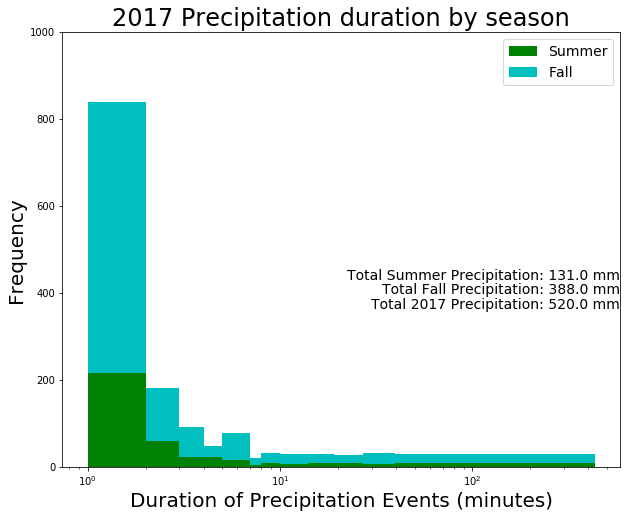

In [46]:
plt.figure(figsize = (10,8))
plt.hist([ Su_precip17,Fprecip17], bins =perc17_100, range= (precip17.min,precip17.max), color = ['g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,1000)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2017 Precipitation duration by season', fontsize = 24)
#plt.figtext(0.5, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep,2)) + ' mm', fontsize = 14)
#plt.figtext(0.5, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep,2)) + ' mm', fontsize = 14)
plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep17)) + ' mm', fontsize = 14, ha = 'right')
plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep17)) + ' mm', fontsize = 14, ha = 'right')
plt.figtext(0.9, 0.4, 'Total 2017 Precipitation: ' + str(round(totalprep17)) + ' mm', fontsize = 14,ha='right')
plt.legend(labels = [ 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [47]:
Winter20_1 = histplot.getData(19,direct, ASC, 335, 31, 6, float)
Winter20_2 = histplot.getData(20, direct, ASC, 1, 60, 6, float)
Spring20 = histplot.getData(20,direct, ASC, 61, 92,6, float)
Summer20 = histplot.getData(20, direct, ASC, 153, 92, 6 , float)
Fall20 = histplot.getData(20, direct, ASC, 245, 91, 6, float)

In [48]:
Winter20 = np.concatenate([Winter20_1, Winter20_2])


In [49]:

Season20 = np.concatenate([Winter20, Spring20, Summer20, Fall20])

In [50]:
Wprecip20, Wnonprecip20, Wpreciptotal20, Wtotalprep20 = histplot.preciphist(Winter20, len(Winter20), 5000, 1, 1)
Sp_precip20, Sp_nonprecip20, Sp_preciptotal20, Sp_totalprep20 = histplot.preciphist(Spring20, len(Spring20), 5000, 1, 1)
Su_precip20, Su_nonprecip20, Su_preciptotal20, Su_totalprep20 = histplot.preciphist(Summer20, len(Summer20), 5000, 1, 1)
Fprecip20, Fnonprecip20, Fpreciptotal20, Ftotalprep20 = histplot.preciphist(Fall20, len(Fall20), 5000, 1, 1)

In [51]:
precip20, nonprecip20, preciptotal20, totalprep20 = histplot.preciphist(Season20, len(Season20), 20000, 1, 1)
precip20 = precip20[precip20> 0]
nonprecip20 = nonprecip20[nonprecip20 > 0]
preciptotal20 = preciptotal20[preciptotal20 > 0]
perc20_100 = np.zeros(51)
for i in range(0, 51):
    perc20_100[i] =np.percentile(precip20, i*2)
print(perc20_100)
perc20_98 = perc20_100[:50]
print(perc20_98)


[  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     2.     2.     2.     2.     2.     2.     3.     3.     3.
   4.     4.     5.     6.     7.     8.    10.    13.    19.64  42.
 268.  ]
[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    2.    2.    2.    2.    2.
  2.    3.    3.    3.    4.    4.    5.    6.    7.    8.   10.   13.
 19.64 42.  ]


In [52]:
Wprecip20 = Wprecip20[Wprecip20>0]
Sp_precip20 = Sp_precip20[Sp_precip20>0]
Su_precip20 = Su_precip20[Su_precip20>0]
Fprecip20 = Fprecip20[Fprecip20>0]

In [53]:
one_bin20_100 = np.unique(perc20_100)
one_bin20_98 = np.unique(perc20_98)
stop1 = np.array([1])
one_bin20_100 = np.setdiff1d(one_bin20_100, stop1)
one_bin20_98 = np.setdiff1d(one_bin20_98, stop1)
print(one_bin20_100)
print(one_bin20_98)
hist20_100, bin20_edge100 = np.histogram(precip20, bins = one_bin20_100)
hist20_98, bin20_edge98 = np.histogram(precip20, bins = one_bin20_98)
print(hist20_100)
print(hist20_98)

[  2.     3.     4.     5.     6.     7.     8.    10.    13.    19.64
  42.   268.  ]
[ 2.    3.    4.    5.    6.    7.    8.   10.   13.   19.64 42.  ]
[427 208 151  97  70  46  65  90  80  68  70]
[427 208 151  97  70  46  65  90  80  71]


In [54]:
curve20_100, bin20_val_100 = histplot.calc(precip20, one_bin20_100)
print(curve20_100)
print(bin20_val_100)


[ -0.31544661 204.51174457]
[  2.5    3.5    4.5    5.5    6.5    7.5    9.    11.5   16.32  30.82
 155.  ]


In [55]:
curve20_98, bin20_val_98 = histplot.calc(precip20, one_bin20_98)
print(curve20_98)
print(bin20_val_98)


[ -0.61874009 359.03930383]
[ 2.5   3.5   4.5   5.5   6.5   7.5   9.   11.5  16.32 30.82]


In [56]:
hist20_100_predict =curve20_100[1]*np.exp(curve20_100[0]*np.log(bin20_val_100))
print(hist20_100_predict)
hist20_98_predict =curve20_98[1]*np.exp(curve20_98[0]*np.log(bin20_val_98))
print(hist20_98_predict)

[153.17554176 137.75070523 127.25198852 119.4464783  113.315022
 108.31363742 102.25997559  94.65089197  84.75587011  69.35392426
  41.66635745]
[203.66694812 165.38848977 141.57064883 125.04027345 112.76125695
 103.20637085  92.19638554  79.22198394  63.7945258   43.04686739]


In [57]:
R2_20_100_reg = r2_calc(hist20_100, hist20_100_predict)
print(R2_20_100_reg)
R2_20_98_reg = r2_calc(hist20_98, hist20_98_predict)
print(R2_20_98_reg)

88978.97361010339
121942.18181818181
0.27031834035270264
59569.46045891269
118282.5
0.49637976489410784


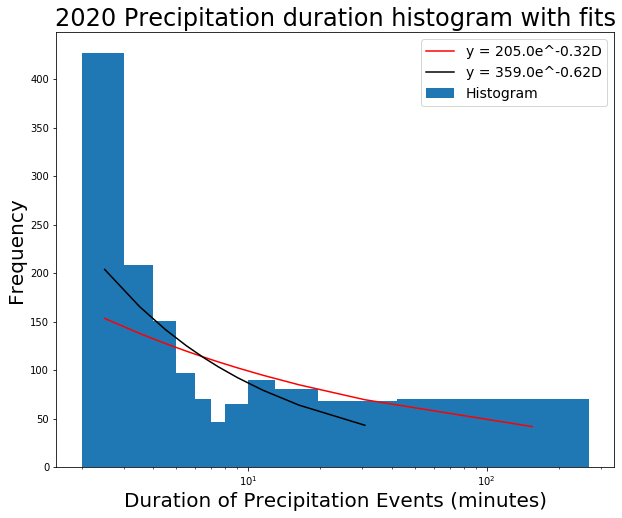

In [58]:
plt.figure(figsize = (10,8))
plt.bar(bin20_val_100, hist20_100, np.diff(bin20_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 Precipitation duration histogram with fits', fontsize = 24)
plt.plot(bin20_val_100, hist20_100_predict, color = 'r')
plt.plot(bin20_val_98, hist20_98_predict, color = 'k')
label_20_100 = 'y = ' + str(round(curve20_100[1])) + 'e^' + str(round(curve20_100[0],2)) + 'D'
label_20_98 = 'y = ' + str(round(curve20_98[1])) + 'e^' + str(round(curve20_98[0],2)) + 'D'
plt.legend(labels = [label_20_100, label_20_98, 'Histogram'], fontsize = 14)

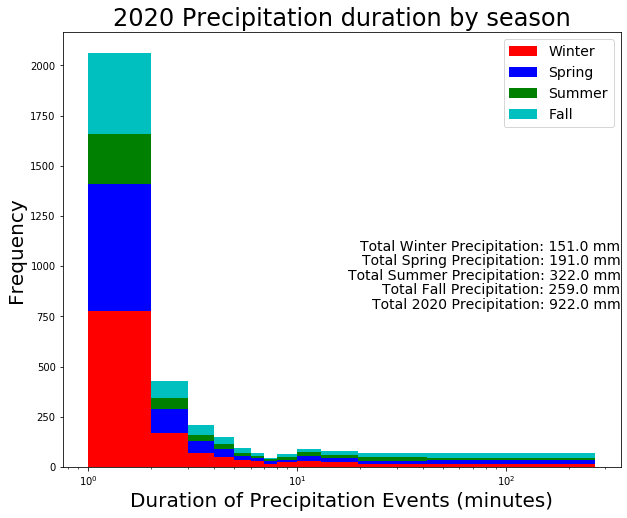

In [60]:
plt.figure(figsize = (10,8))
plt.hist([Wprecip20, Sp_precip20, Su_precip20,Fprecip20], bins =perc20_100, range= (precip20.min,precip20.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2020 Precipitation duration by season', fontsize = 24)
plt.figtext(0.9, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep20)) + ' mm', fontsize = 14,ha='right')
plt.figtext(0.9, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep20)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep20)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep20)) + ' mm', fontsize = 14,ha='right')
plt.figtext(0.9, 0.4, 'Total 2020 Precipitation: ' + str(round(totalprep20)) + ' mm', fontsize = 14,ha='right')
plt.legend(labels = ['Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)


In [61]:
Winter19_1 = histplot.getData(18,direct, ASC, 335, 31, 6, float)
Winter19_2 = histplot.getData(19, direct, ASC, 1, 59, 6, float)
Spring19 = histplot.getData(19,direct, ASC, 60, 92,6, float)
Summer19 = histplot.getData(19, direct, ASC, 152, 92, 6 , float)
Fall19 = histplot.getData(19, direct, ASC, 244, 91, 6, float)

In [62]:
Winter19 = np.concatenate([Winter19_1, Winter19_2])

In [63]:
Season19 = np.concatenate([Winter19, Spring19, Summer19, Fall19])

In [64]:
Wprecip19, Wnonprecip19, Wpreciptotal19, Wtotalprep19 = histplot.preciphist(Winter19, len(Winter19), 5000, 1, 1)
Sp_precip19, Sp_nonprecip19, Sp_preciptotal19, Sp_totalprep19 = histplot.preciphist(Spring19, len(Spring19), 5000, 1, 1)
Su_precip19, Su_nonprecip19, Su_preciptotal19, Su_totalprep19 = histplot.preciphist(Summer19, len(Summer19), 5000, 1, 1)
Fprecip19, Fnonprecip19, Fpreciptotal19, Ftotalprep19 = histplot.preciphist(Fall19, len(Fall19), 5000, 1, 1)

In [67]:
precip19, nonprecip19, preciptotal19, totalprep19 = histplot.preciphist(Season19, len(Season19), 20000, 1, 1)
precip19 = precip19[precip19> 0]
nonprecip19 = nonprecip19[nonprecip19 > 0]
preciptotal19 = preciptotal19[preciptotal19 > 0]
perc19_100 = np.zeros(51)
for i in range(0, 51):
    perc19_100[i] =np.percentile(precip19, i*2)
print(perc19_100)
perc19_98 = perc19_100[:50]
print(perc19_98)

[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   2.   2.   2.   2.   2.   3.   3.   3.   4.   4.   5.   5.
   6.   7.   9.  11.  13.  18.  25.  42. 368.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.
  3.  3.  4.  4.  5.  5.  6.  7.  9. 11. 13. 18. 25. 42.]


In [68]:
Wprecip19 = Wprecip19[Wprecip19>0]
Sp_precip19 = Sp_precip19[Sp_precip19>0]
Su_precip19 = Su_precip19[Su_precip19>0]
Fprecip19 = Fprecip19[Fprecip19>0]

In [69]:
one_bin19_100 = np.unique(perc19_100)
one_bin19_98 = np.unique(perc19_98)
stop1 = np.array([1])
one_bin19_100 = np.setdiff1d(one_bin19_100, stop1)
one_bin19_98 = np.setdiff1d(one_bin19_98, stop1)
print(one_bin19_100)
print(one_bin19_98)
hist19_100, bin19_edge100 = np.histogram(precip19, bins = one_bin19_100)
hist19_98, bin19_edge98 = np.histogram(precip19, bins = one_bin19_98)
print(hist19_100)
print(hist19_98)

[  2.   3.   4.   5.   6.   7.   9.  11.  13.  18.  25.  42. 368.]
[ 2.  3.  4.  5.  6.  7.  9. 11. 13. 18. 25. 42.]
[342 192 118  93  66 107  62  63  80  58  69  66]
[342 192 118  93  66 107  62  63  80  58  72]


In [70]:
curve19_100, bin19_val_100 = histplot.calc(precip19, one_bin19_100)
print(curve19_100)
print(bin19_val_100)
curve19_98, bin19_val_98 = histplot.calc(precip19, one_bin19_98)
print(curve19_98)
print(bin19_val_98)

[ -0.29177808 187.19998387]
[  2.5   3.5   4.5   5.5   6.5   8.   10.   12.   15.5  21.5  33.5 205. ]
[ -0.54513384 307.79599801]
[ 2.5  3.5  4.5  5.5  6.5  8.  10.  12.  15.5 21.5 33.5]


In [71]:
hist19_100_predict =curve19_100[1]*np.exp(curve19_100[0]*np.log(bin19_val_100))
print(hist19_100_predict)
hist19_98_predict =curve19_98[1]*np.exp(curve19_98[0]*np.log(bin19_val_98))
print(hist19_98_predict)

[143.28331999 129.88490422 120.70151323 113.83719973 108.42152456
 102.04787036  95.61537408  90.66180821  84.13817957  76.47675877
  67.19410343  39.60834602]
[186.78087417 155.47947531 135.57347333 121.5251631  110.94721086
  99.07362554  87.72616179  79.42637679  69.08326881  57.79705024
  45.38469659]


In [72]:
R2_19_100_reg = r2_calc(hist19_100, hist19_100_predict)
print(R2_19_100_reg)
R2_19_98_reg = r2_calc(hist19_98, hist19_98_predict)
print(R2_19_98_reg)

48565.66525550925
74578.66666666666
0.3487994968778928
30391.568657257976
72238.90909090909
0.5792908691490386


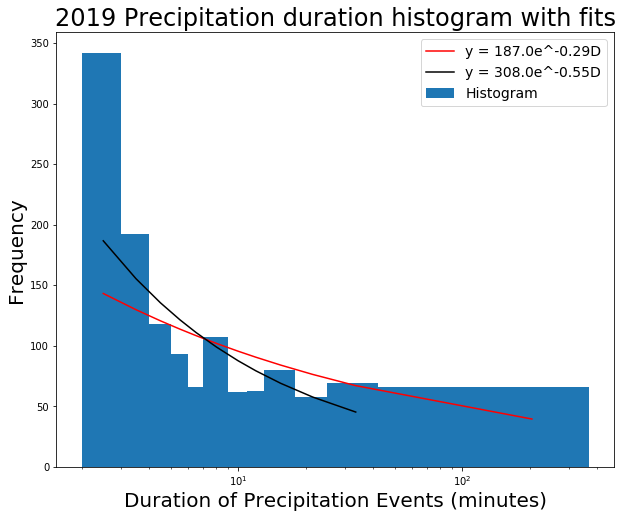

In [74]:
plt.figure(figsize = (10,8))
plt.bar(bin19_val_100, hist19_100, np.diff(bin19_edge100))
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
#plt.ylim(0,2500)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 Precipitation duration histogram with fits', fontsize = 24)
plt.plot(bin19_val_100, hist19_100_predict, color = 'r')
plt.plot(bin19_val_98, hist19_98_predict, color = 'k')
label_19_100 = 'y = ' + str(round(curve19_100[1])) + 'e^' + str(round(curve19_100[0],2)) + 'D'
label_19_98 = 'y = ' + str(round(curve19_98[1])) + 'e^' + str(round(curve19_98[0],2)) + 'D'
plt.legend(labels = [label_19_100, label_19_98, 'Histogram'], fontsize = 14)

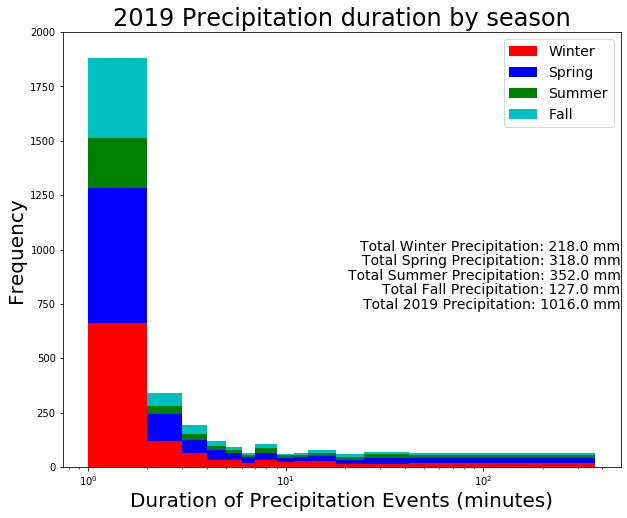

In [75]:

plt.figure(figsize = (10,8))
plt.hist([Wprecip19, Sp_precip19, Su_precip19,Fprecip19], bins =perc19_100, range= (precip19.min,precip19.max), color = ['r','b','g','c'], stacked =True)
plt.xlabel('Duration of Precipitation Events (minutes)', fontsize = 20)
plt.xscale('log')
plt.ylim(0,2000)
#plt.yscale('log')
plt.ylabel('Frequency', fontsize = 20)
plt.title('2019 Precipitation duration by season', fontsize = 24)
plt.figtext(0.9, 0.5, 'Total Winter Precipitation: ' + str(round(Wtotalprep19)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.475, 'Total Spring Precipitation: ' + str(round(Sp_totalprep19)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.45, 'Total Summer Precipitation: ' + str(round(Su_totalprep19)) + ' mm', fontsize = 14, ha='right')
plt.figtext(0.9, 0.425, 'Total Fall Precipitation: ' + str(round(Ftotalprep19)) + ' mm', fontsize = 14,ha='right')
plt.figtext(0.9, 0.4, 'Total 2019 Precipitation: ' + str(round(totalprep19)) + ' mm', fontsize = 14,ha='right')
plt.legend(labels = ['Winter', 'Spring', 'Summer', 'Fall'], fontsize = 14)
#plt.figtext(0.3, 0.6, 'Exponential fit equation between 2 minutes to 42 minutes: $ y = e^{5.74}*e^{-0.54x}$' )

In [76]:
Sp_curve_fit = calc(Sp_precip19, Wperc19)
print(Sp_curve_fit)

[ -0.52088703 122.45818198]


In [77]:
print(np.exp(curve_fit[1]))

88.99619199987698


In [69]:
Su_curve_fit19 = calc(Su_precip19, Wperc19)
print(Su_curve_fit19)


[-0.40553413 49.41193243]


In [70]:
Fcurve_fit19 = calc(Fprecip19, Wperc19)
print(Fcurve_fit19)

[-0.55962208 69.12651996]


In [79]:
W_f19 = calc(Wprecip19, perc19)
Sp_f19 = calc(Sp_precip19, perc19)
Su_f19 = calc(Su_precip19, perc19)
F_f19 = calc(Fprecip19, perc19)
print(W_f19)
print(Sp_f19)
print(Su_f19)
print(F_f19)

[-0.34218061 67.92717116]
[-0.28585    59.83352026]
[-0.18635456 25.33809878]
[-0.3160019  32.90354345]


In [71]:
perc20 = one_bin
print(perc20)

[  2.   3.   4.   5.   6.   8.  10.  13.  19.  42. 268.]


In [72]:
W_cf = calc(Wprecip20, perc20)
Sp_cf = calc(Sp_precip20, perc20)
Su_cf = calc(Su_precip20, perc20)
F_cf = calc(Fprecip20, perc20)
print(W_cf)
print(Sp_cf)
print(Su_cf)
print(F_cf)

[ -0.51587648 119.30025908]
[-0.32529406 60.35297715]
[-0.2671361 36.3079918]
[-0.2344435  29.30410359]


In [84]:
perc17 = np.zeros(51)
for i in range(0, 51):
    perc17[i] =np.percentile(precip17[:countAll], i*2)
perc17 = np.unique(perc17)
print(perc17)
second = np.array([0,1])
perc17 = np.setdiff1d(perc17, second)
print(perc17)

[  0.   1.   2.   3.   4.   5.   7.  12.  26. 433.]
[  2.   3.   4.   5.   7.  12.  26. 433.]


In [85]:
#W_cf17 = calc(Wprecip20, perc20)
#Sp_cf = calc(Sp_precip20, perc20)
Su_cf17 = calc(Su_precip17, perc17)
F_cf17 = calc(Fprecip17, perc17)
#print(W_cf)
#print(Sp_cf)
print(Su_cf17)
print(F_cf17)

[-0.14606822 32.41665985]
[-0.09276905 67.74937873]


[  2.   3.   4.   5.   7.  12.  26. 433.]
[  2.   3.   4.   5.   7.  12.  26. 433.]


In [91]:

W_cf18 = calc(Wprecip18, one_bin)
Sp_cf18 = calc(Sp_precip18, one_bin)
Su_cf18 = calc(Su_precip18, one_bin)
F_cf18 = calc(Fprecip18, one_bin)
print(W_cf18)
print(Sp_cf18)
print(Su_cf18)
print(F_cf18)

[-0.37813023 73.52582575]
[-0.27473188 46.16627468]
[-0.23640581 37.83472133]
[-0.2327441  55.17582818]


In [76]:
print(totalprep17)
print(totalprep18)
print(totalprep19)
print(totalprep20)

519.6899999999737
1104.409999999886
1016.3399999998909
858.1799999999121


In [78]:
print(sum(precip18))
print(sum(precip17))
print(sum(precip19))
print(sum(precip20))

18072.0
7598.0
17044.0
15235.0


In [79]:
int17 = totalprep17/sum(precip17)
int18 = totalprep18/sum(precip18)
int19 = totalprep19/sum(precip19)
int20 = totalprep20/sum(precip20)

In [80]:
print(int17)
print(int18)
print(int19)
print(int20)


0.06839826270070724
0.06111166445329161
0.059630368458102025
0.05632950443058169


In [82]:
Su_int17 = Su_totalprep17/sum(Su_precip17)
F_int17 = Ftotalprep17/sum(Fprecip17)
print(Su_int17)
print(F_int17)
print(Su_totalprep17)
print(Ftotalprep17)

0.07127440347071655
0.06747653806047849
131.43000000000131
388.25999999999317


In [83]:
Su_int18 = Su_totalprep18/sum(Su_precip18)
F_int18 = Ftotalprep18/sum(Fprecip18)
Sp_int18 = Sp_totalprep18/sum(Sp_precip18)
W_int18 = Wtotalprep18/sum(Wprecip18)
print(Su_int18)
print(F_int18)
print(Su_totalprep18)
print(Ftotalprep18)
print(Sp_int18)
print(W_int18)
print(Sp_totalprep18)
print(Wtotalprep18)

0.07822585351619402
0.06747653806047849
268.0799999999969
388.25999999999317
0.06652682711415259
0.03364740944520913
301.29999999999706
146.77000000000223


In [85]:
W_int19 = Wtotalprep19/sum(Wprecip19)
Sp_int19 = Sp_totalprep19/sum(Sp_precip19)
Su_int19 = Su_totalprep19/sum(Su_precip19)
F_int19 = Ftotalprep19/sum(Fprecip19)
print(W_int19)
print(Sp_int19)
print(Wtotalprep19)
print(Sp_totalprep19)
print(Su_int19)
print(F_int19)
print(Su_totalprep19)
print(Ftotalprep19)

0.0404611965178736
0.056015487504399254
218.4499999999996
318.27999999999656
0.1110970996216882
0.045578645646722704
352.399999999995
127.21000000000306


In [86]:
W_int20 = Wtotalprep20/sum(Wprecip20)
Sp_int20 = Sp_totalprep20/sum(Sp_precip20)
Su_int20 = Su_totalprep20/sum(Su_precip20)
F_int20 = Ftotalprep20/sum(Fprecip20)
print(W_int20)
print(Sp_int20)
print(Wtotalprep20)
print(Sp_totalprep20)
print(Su_int20)
print(F_int20)
print(Su_totalprep20)
print(Ftotalprep20)

0.0313906735751291
0.042436525612471604
151.4599999999979
190.5399999999975
0.12050187265917418
0.05982769230769262
321.73999999999506
194.44000000000102


In [ ]:
# We should be calculating an r^2 value from the log values of what we are looking at rather than the actual value. 
# We can probably try both to see what the difference is, and if it affects our determination. 